In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
#dados = pd.read_csv('/content/drive/MyDrive/MIT Python Colab/Escantilhão/dados_escant.csv', encoding='utf-8', sep=';')
#dados = pd.read_excel('/content/drive/MyDrive/MIT Python Colab/Escantilhão/dados_escant.xlsx')



In [168]:
data = {'x': [-5, 1, 5.7, 11.7, 4.8, 7.8, -2.1, 0.8, -1.5, 5],
        'y': [2.8, 3.1, -12.4, 0.2, -9.3, -0.4, 9.9, -1.2, 1.2, -6.5]}

# Criando o dataframe
dados = pd.DataFrame(data)

In [169]:
dados

,x,y
0,-5.0,2.8
1,1.0,3.1
2,5.7,-12.4
3,11.7,0.2
4,4.8,-9.3
5,7.8,-0.4
6,-2.1,9.9
7,0.8,-1.2
8,-1.5,1.2
9,5.0,-6.5


In [170]:
dados_calc = dados

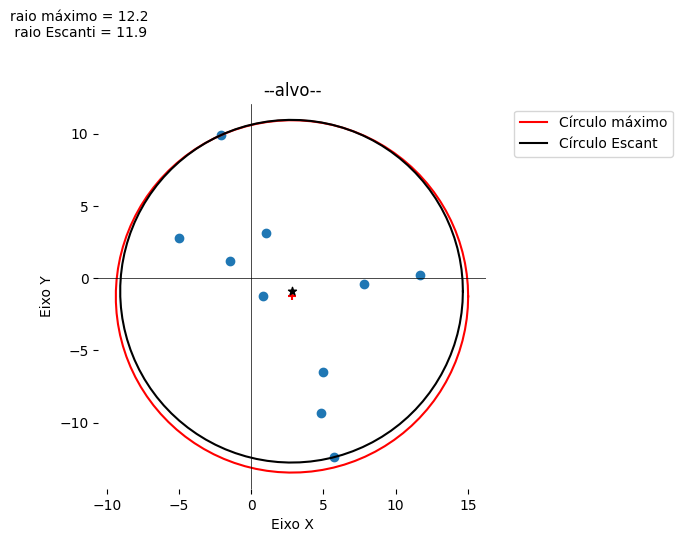

In [178]:
# Coordenadas do centro e raio do círculo
dados_calc['dist_0'] = (dados_calc['x']**2 + dados_calc['y']**2)**0.5
centro_x, centro_y = dados_calc['x'].mean(), dados_calc['y'].mean()
dados_calc['dist_m'] = ((centro_x-dados_calc['x'])**2 + (centro_y-dados_calc['y'])**2)**0.5

c_escant_x, c_escant_y = (dados_calc['x'].max()+dados_calc['x'].min())/2, (dados_calc['y'].max()+dados_calc['y'].min())/2
dados_calc['dist_s'] = ((c_escant_x-dados_calc['x'])**2 + (c_escant_y-dados_calc['y'])**2)**0.5

raio = dados_calc['dist_m'].max()
raio_scant = dados_calc['dist_s'].max()

#print(dados_calc['x'].mean(), dados_calc['y'].mean())

# Gera pontos ao redor do círculo
theta = np.linspace(0, 2*np.pi, 100)
cx = centro_x + raio * np.cos(theta)
cy = centro_y + raio * np.sin(theta)

cxs = c_escant_x + raio_scant * np.cos(theta)
cys = c_escant_y + raio_scant * np.sin(theta)


centro_ajus_x = centro_x
centro_ajus_y = centro_y

zz = 0
while zz <= 1:
  #print('zz i= '+ str(zz))
  raio_ajustado =  ((centro_ajus_x-dados_calc['x'])**2 + (centro_ajus_y-dados_calc['y'])**2)**0.5

  c = 0.01

  ps = [centro_ajus_x, centro_ajus_y+c]
  pi = [centro_ajus_x, centro_ajus_y-c]
  pd = [centro_ajus_x+c, centro_ajus_y]
  pe = [centro_ajus_x-c, centro_ajus_y]

  pt = [ps, pi, pd, pe]
  #print('pontos =' + str(pt))

  zs = 1/(raio_ajustado.max()/(((ps[0]-dados_calc['x'])**2 + (ps[1]-dados_calc['y'])**2)**0.5).max())
  zi = 1/(raio_ajustado.max()/(((pi[0]-dados_calc['x'])**2 + (pi[1]-dados_calc['y'])**2)**0.5).max())
  zd = 1/(raio_ajustado.max()/(((pd[0]-dados_calc['x'])**2 + (pd[1]-dados_calc['y'])**2)**0.5).max())
  ze = 1/(raio_ajustado.max()/(((pe[0]-dados_calc['x'])**2 + (pe[1]-dados_calc['y'])**2)**0.5).max())

  zt = [zs, zi, zd, ze]
  #print('zt' +str(zt))

  indt = zt.index(min(zt))
  #print(indt)

  pm = pt[indt]
  #print(pm)
  centro_ajus_x = pm[0]
  centro_ajus_y = pm[1]

  zz= min(zt)
  #print('zz o= '+ str(zz))




dados_calc['dist_loop'] = ((centro_ajus_x-dados_calc['x'])**2 + (centro_ajus_y-dados_calc['y'])**2)**0.5

raio_loop = dados_calc['dist_loop'].max()

cxl = centro_ajus_x + raio_loop * np.cos(theta)
cyl = centro_ajus_y + raio_loop * np.sin(theta)

# Plota o círculo
plt.figure(figsize = (5,5))
plt.plot(cx, cy, label='Círculo máximo', color='red')
#plt.plot(cxs, cys, label='Círculo Amplitude/2', color='blue')
plt.plot(cxl, cyl, label='Círculo Escant', color='black')


plt.scatter(x=centro_x, y=centro_y, marker = '+', color='red')
#plt.scatter(x=c_escant_x, y=c_escant_y, marker = 'x', color='blue')
plt.scatter(x=centro_ajus_x, y=centro_ajus_y, marker = '*', color='black')

plt.scatter(x=dados_calc['x'], y=dados_calc['y'])

# Adiciona linhas dos eixos X e Y cruzando no zero
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Configurações adicionais do gráfico, se necessário
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('--alvo--')
#plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.grid(True)
plt.axis('equal')  # Garante proporções iguais nos eixos



# Remove as linhas de grade e a moldura
plt.grid(False)
plt.axis('equal')  # Garante proporções iguais nos eixos
plt.box(False)

# Ajusta as posições dos números de escala
#plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                #labelbottom=True, labelleft=True)

a=dados_calc[['x', 'y']].max().max()+5
#a=100
#plt.axis(xmin=-a, xmax=a, ymin=-a, ymax=a)

#plt.axis('equal',)
# Exibe o gráfico
#plt.text(x=-45, y=40, s= '          raio = ' + str(round(raio)) + '\n' + '  raio_loop = ' + str(round(raio_loop)) + '\n' + 'raio_scant = ' + str(round(raio_scant)))
plt.text(x=-a, y=a, s= 'raio máximo = ' + str(round(raio,1)) + '\n' + ' raio Escanti = ' + str(round(raio_loop,1)))# + '\n' + 'raio_scant = ' + str(round(raio_scant)))


#print(raio)
#print(raio_loop)
#print(raio_scant)

plt.show()


<Axes: >

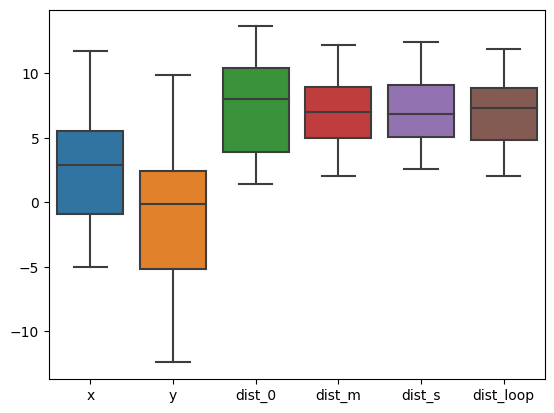

In [176]:
sns.boxplot(dados_calc)

In [177]:
raio_ajustado.max()

11.860016863394419

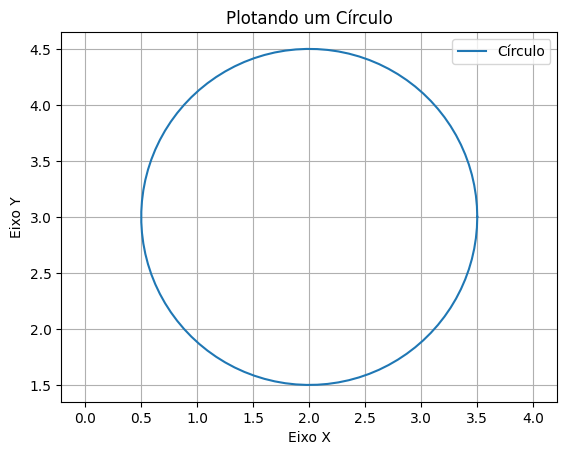

In [ ]:


# Coordenadas do centro e raio do círculo
centro_x, centro_y = 2, 3
raio = 1.5

# Gera pontos ao redor do círculo
theta = np.linspace(0, 2*np.pi, 100)
x = centro_x + raio * np.cos(theta)
y = centro_y + raio * np.sin(theta)

# Plota o círculo
plt.plot(x, y, label='Círculo')

# Configurações adicionais do gráfico, se necessário
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotando um Círculo')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Garante proporções iguais nos eixos

# Exibe o gráfico
plt.show()


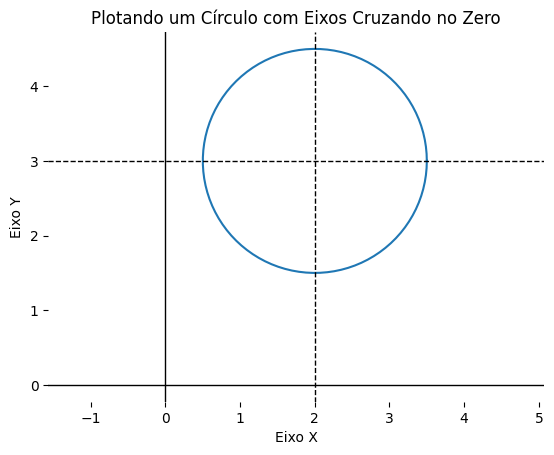

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coordenadas do centro e raio do círculo
centro_x, centro_y = 2, 3
raio = 1.5

# Gera pontos ao redor do círculo
theta = np.linspace(0, 2*np.pi, 100)
x = centro_x + raio * np.cos(theta)
y = centro_y + raio * np.sin(theta)

# Plota o círculo
plt.plot(x, y, label='Círculo')

# Adiciona linhas dos eixos X e Y cruzando no zero
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Configurações adicionais do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotando um Círculo com Eixos Cruzando no Zero')

# Remove as linhas de grade e a moldura
plt.grid(False)
plt.axis('equal')  # Garante proporções iguais nos eixos
plt.box(False)

# Desloca os próprios eixos para o ponto de cruzamento
plt.axhline(y=centro_y, color='black', linestyle='--', linewidth=1)
plt.axvline(x=centro_x, color='black', linestyle='--', linewidth=1)

# Exibe o gráfico
plt.show()


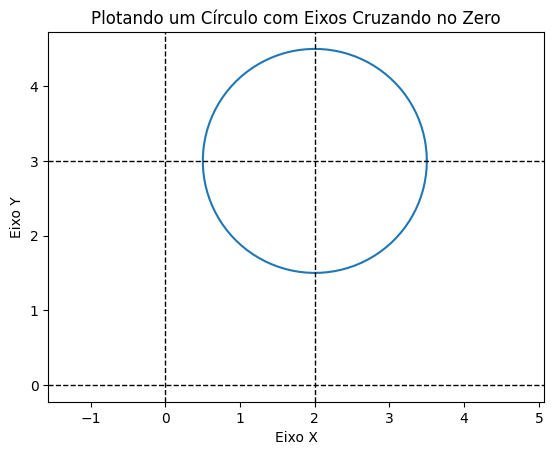

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Coordenadas do centro e raio do círculo
centro_x, centro_y = 2, 3
raio = 1.5

# Gera pontos ao redor do círculo
theta = np.linspace(0, 2*np.pi, 100)
x = centro_x + raio * np.cos(theta)
y = centro_y + raio * np.sin(theta)

# Plota o círculo
plt.plot(x, y, label='Círculo')

# Adiciona linhas dos eixos X e Y cruzando no zero
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Configurações adicionais do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotando um Círculo com Eixos Cruzando no Zero')

# Remove as linhas de grade e a moldura
plt.grid(False)

# Desloca os próprios eixos para o ponto de cruzamento
plt.axhline(y=centro_y, color='black', linestyle='--', linewidth=1)
plt.axvline(x=centro_x, color='black', linestyle='--', linewidth=1)

# Garante escalas idênticas nos eixos X e Y
plt.axis('equal')

# Exibe o gráfico
plt.show()
